The goal of this notebook is to generate data for our experiments.

The generated data will have:
* correlated and uncorrelated normally distributed variables
* categorical variables
* ordinal variables
* different scales

With this data, we will create specific target variables, obtained both by linear and non-linear relationships by using
* All the variables
* Only the uncorrelated
* Only the correlated
* Only 3 variables

Moreover, we will also make these data dirtier (after creating the target variables) by
* adding random noise
* removing random entries (or random entries based on categories)
* adding outliers

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import random

%matplotlib inline
pd.set_option('max_columns', 500)
np.random.seed(23)
random.seed(23)

# Data generation

In [2]:
def make_uncorrelated(data, n_entries):
    df = data.copy()
    np.random.seed(23)
    random.seed(23)
    # normal distributions
    df['unc_normal_1'] = np.random.normal(loc=0, scale=0.5, size=n_entries)
    df['unc_normal_2'] = np.random.normal(loc=10, scale=1, size=n_entries)
    # Skewed distribution
    df['unc_skewed_pos'] = np.expm1(np.random.normal(loc=1.3, scale=0.5, size=n_entries))
    df['unc_skewed_neg'] = 40 - np.expm1(np.random.normal(loc=2.3, scale=0.3, size=n_entries))
    
    # categorical variables
    df['unc_binary'] = np.random.choice([0, 1], size=(n_entries,), p=[1/3, 2/3])
    df['unc_categories_5'] = np.random.choice(['a', 'b', 'c', 'd', 'e'], size=(n_entries,), p=[2/5, 1/5, 1/10, 3/15, 1/10])
    i = 0
    random_cats = []
    # generate 100 random strings of 3 categories
    while i < 100:
        random_cats.append(''.join([random.choice(string.ascii_lowercase) for _ in range(3)]))
        i += 1
    df['unc_categories_100'] = np.random.choice(random_cats, size=(n_entries,))
    
    df['unc_ordinal'] = np.random.choice(np.arange(1,100), size=(n_entries,))
    
    return df


def make_correlated(data, n_entries):
    df = data.copy()
    np.random.seed(23)
    random.seed(23)
    # correlation with 1 category
    df['corr_cat_1'] = np.random.choice([0, 1], size=(n_entries,), p=[1/3, 2/3])
    df['corr_cat_2'] = np.random.choice([0, 1], size=(n_entries,))
    df.loc[df.corr_cat_1 == 0, 'corr_normal_by_cat'] = np.random.normal(loc=-0.5, scale=0.4, size=n_entries - df.corr_cat_1.sum())
    df.loc[df.corr_cat_1 == 1, 'corr_normal_by_cat'] = np.random.normal(loc=1, scale=0.2, size=df.corr_cat_1.sum())
    
    # correlation with 2 categories
    tmp = df.groupby(['corr_cat_1', 'corr_cat_2']).size()
    df.loc[(df.corr_cat_1 == 0) & (df.corr_cat_2 == 0) , 'corr_normal_by_2cats'] = np.random.normal(loc=2, scale=0.4, size=tmp[0][0])
    df.loc[(df.corr_cat_1 == 0) & (df.corr_cat_2 == 1) , 'corr_normal_by_2cats'] = np.random.normal(loc=4, scale=0.65, size=tmp[0][1])
    df.loc[(df.corr_cat_1 == 1) & (df.corr_cat_2 == 0) , 'corr_normal_by_2cats'] = np.random.normal(loc=1, scale=1, size=tmp[1][0])
    df.loc[(df.corr_cat_1 == 1) & (df.corr_cat_2 == 1) , 'corr_normal_by_2cats'] = np.random.normal(loc=-1, scale=0.5, size=tmp[1][1])
    
    # multinormals with different correlations
    df['corr_multinormal_high_a'] = 0
    df['corr_multinormal_high_b'] = 0
    df[['corr_multinormal_high_a', 'corr_multinormal_high_b']] = np.random.multivariate_normal(mean=[6, -2], cov=[[2, -0.8], [-0.8, 0.5]], size=n_entries)
    
    df['corr_multinormal_mid_a'] = 0
    df['corr_multinormal_mid_b'] = 0
    df[['corr_multinormal_mid_a', 'corr_multinormal_mid_b']] = np.random.multivariate_normal(mean=[20, 11], cov=[[7, 2.9], [2.9, 5]], size=n_entries)
    
    df['corr_multinormal_low_a'] = 0
    df['corr_multinormal_low_b'] = 0
    df[['corr_multinormal_low_a', 'corr_multinormal_low_b']] = np.random.multivariate_normal(mean=[-6, 4], cov=[[1, 0.3], [0.3, 2]], size=n_entries)
    
    return df

In [3]:
data = pd.DataFrame()

data = make_uncorrelated(data, 100000)
data = make_correlated(data, 100000)

data.head()

,unc_normal_1,unc_normal_2,unc_skewed_pos,unc_skewed_neg,unc_binary,unc_categories_5,unc_categories_100,unc_ordinal,corr_cat_1,corr_cat_2,corr_normal_by_cat,corr_normal_by_2cats,corr_multinormal_high_a,corr_multinormal_high_b,corr_multinormal_mid_a,corr_multinormal_mid_b,corr_multinormal_low_a,corr_multinormal_low_b
0,0.333494,9.046767,2.098417,29.620455,0,b,ljr,7,1,0,0.541971,0.351782,8.430675,-3.355695,25.236371,11.646659,-5.525505,4.621740
1,0.012907,10.954762,2.895381,29.842289,1,a,vah,22,1,1,0.857349,-0.629935,3.334968,-0.792505,20.909618,11.555425,-5.988788,2.057060
2,-0.388810,9.986689,3.343133,29.393639,0,d,slv,81,1,0,1.244200,2.232988,3.895617,-1.586941,21.466997,11.038788,-5.470228,5.952688
3,0.474317,10.710674,3.307999,28.968660,1,d,exm,95,0,1,0.092622,3.870697,8.248896,-3.246644,21.905036,9.963264,-5.431880,3.758482
4,0.350836,9.140127,1.827119,28.887216,0,d,jgc,29,0,1,-0.230801,4.352840,4.496770,-1.173505,17.377266,6.832519,-8.288617,3.684319


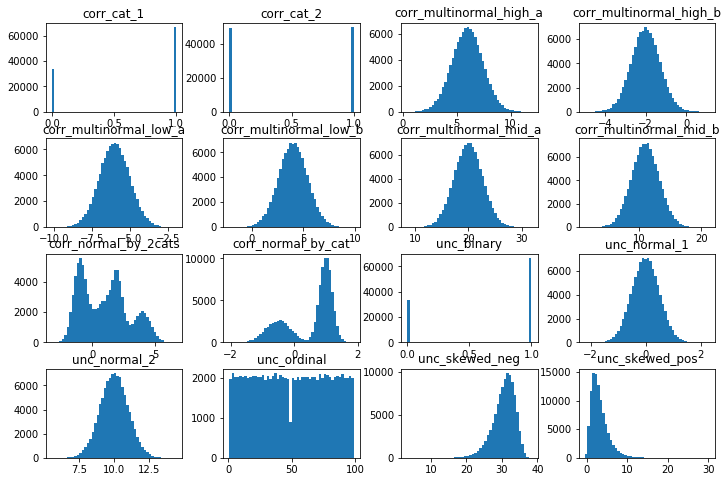

In [4]:
data.hist(bins=50, figsize=(12,8), grid=False)
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
unc_normal_1               100000 non-null float64
unc_normal_2               100000 non-null float64
unc_skewed_pos             100000 non-null float64
unc_skewed_neg             100000 non-null float64
unc_binary                 100000 non-null int64
unc_categories_5           100000 non-null object
unc_categories_100         100000 non-null object
unc_ordinal                100000 non-null int64
corr_cat_1                 100000 non-null int64
corr_cat_2                 100000 non-null int64
corr_normal_by_cat         100000 non-null float64
corr_normal_by_2cats       100000 non-null float64
corr_multinormal_high_a    100000 non-null float64
corr_multinormal_high_b    100000 non-null float64
corr_multinormal_mid_a     100000 non-null float64
corr_multinormal_mid_b     100000 non-null float64
corr_multinormal_low_a     100000 non-null float64
corr_multinormal_low_b     100000

In [6]:
data.describe(include='all').fillna('-')

,unc_normal_1,unc_normal_2,unc_skewed_pos,unc_skewed_neg,unc_binary,unc_categories_5,unc_categories_100,unc_ordinal,corr_cat_1,corr_cat_2,corr_normal_by_cat,corr_normal_by_2cats,corr_multinormal_high_a,corr_multinormal_high_b,corr_multinormal_mid_a,corr_multinormal_mid_b,corr_multinormal_low_a,corr_multinormal_low_b
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,-,-,-,-,-,5,100,-,-,-,-,-,-,-,-,-,-,-
top,-,-,-,-,-,a,fao,-,-,-,-,-,-,-,-,-,-,-
freq,-,-,-,-,-,39976,1070,-,-,-,-,-,-,-,-,-,-,-
mean,-0.00353272,9.99797,3.15068,30.5588,0.66704,-,-,49.9657,0.66588,0.50123,0.498332,1.00963,6.00213,-1.99846,19.9927,11.0041,-5.99572,4.00435
std,0.500637,0.99882,2.21203,3.18565,0.471275,-,-,28.6357,0.471684,0.500001,0.761824,1.87658,1.41157,0.707012,2.64807,2.23476,1.00236,1.4138
min,-2.21133,5.55834,-0.529371,3.29279,0,-,-,1,0,0,-2.03729,-3.17371,0.42189,-5.00995,8.49566,1.19039,-10.1359,-2.17589
25%,-0.34129,9.3227,1.61823,28.7694,0,-,-,25,0,0,-0.235731,-0.719836,5.04508,-2.4741,18.1912,9.49631,-6.67217,3.04862
50%,-0.00250501,9.99955,2.66975,31.0192,1,-,-,50,1,1,0.863736,0.995326,6.00482,-1.99784,19.9951,11.0076,-5.99418,4.00295
75%,0.335074,10.669,4.13198,32.8388,1,-,-,75,1,1,1.06397,2.23844,6.94972,-1.52092,21.7853,12.5068,-5.31704,4.9575


In [7]:
data[[col for col in data.columns if 'corr_' in col]].corr()

,corr_cat_1,corr_cat_2,corr_normal_by_cat,corr_normal_by_2cats,corr_multinormal_high_a,corr_multinormal_high_b,corr_multinormal_mid_a,corr_multinormal_mid_b,corr_multinormal_low_a,corr_multinormal_low_b
corr_cat_1,1.000000,-0.008561,0.928559,-0.756343,0.002882,-0.005980,0.006086,0.004790,0.000929,-0.003150
corr_cat_2,-0.008561,1.000000,-0.010041,-0.170186,0.000450,-0.001931,-0.000354,-0.000303,-0.000611,0.001700
corr_normal_by_cat,0.928559,-0.010041,1.000000,-0.701950,0.002613,-0.004975,0.005066,0.005021,0.000244,-0.004952
corr_normal_by_2cats,-0.756343,-0.170186,-0.701950,1.000000,-0.001224,0.004205,-0.000101,-0.001352,-0.003449,0.003034
corr_multinormal_high_a,0.002882,0.000450,0.002613,-0.001224,1.000000,-0.800776,0.000673,0.003431,-0.005550,0.002161
corr_multinormal_high_b,-0.005980,-0.001931,-0.004975,0.004205,-0.800776,1.000000,-0.001702,-0.006598,0.002239,-0.002591
corr_multinormal_mid_a,0.006086,-0.000354,0.005066,-0.000101,0.000673,-0.001702,1.000000,0.492911,-0.007219,-0.001978
corr_multinormal_mid_b,0.004790,-0.000303,0.005021,-0.001352,0.003431,-0.006598,0.492911,1.000000,-0.005923,-0.006919
corr_multinormal_low_a,0.000929,-0.000611,0.000244,-0.003449,-0.005550,0.002239,-0.007219,-0.005923,1.000000,0.215213
corr_multinormal_low_b,-0.003150,0.001700,-0.004952,0.003034,0.002161,-0.002591,-0.001978,-0.006919,0.215213,1.000000


# Target variables creation

In [8]:
def linear_targets(data, tmp):
    df = data.copy()
    np.random.seed(23)
    entries = df.shape[0]
    
    # all
    coefs = [3, 0.4, -0.01, 0.03, -2.4, 0.11, 0.1, 6, 2.36, 7.3, 0.75, 0.69, -9.47, 0.73, 1.98, 4.61,
       -0.5, 3.8, 0.16, -0.4, -1]
    df['tar_lin_full'] = tmp.multiply(coefs, axis=1).sum(axis=1) + np.random.normal(2, 1, size=entries)
    
    # all the uncorrelated
    coefs = [3, 0.4, -0.01, 0.03, -2.4, 0.11, 0.1, 6, 2.36, 7.3, 0.75]
    df['tar_lin_unc'] = tmp[[col for col in tmp.columns if col.startswith('unc_')]].multiply(coefs, axis=1).sum(axis=1) + np.random.normal(1, 0.4, size=entries)
    
    # all the correlated
    coefs = [3, 0.4, -0.01, 0.03, -2.4, 0.11, 0.1, -6, 2.36, 7.3, -0.8]
    df['tar_lin_corr'] = tmp[[col for col in tmp.columns if col.startswith('unc_')]].multiply(coefs, axis=1).sum(axis=1) + np.random.normal(4, 1, size=entries)
    
    # 3 variables
    coefs = [0.4, -0.01, 0.03]
    df['tar_lin_3'] = tmp[['unc_normal_1', 'corr_normal_by_cat', 'corr_multinormal_mid_a']].multiply(coefs, axis=1).sum(axis=1) + np.random.normal(-0.7, 1, size=entries)
    
    return df


def nonlinear_targets(data, tmp):
    df = data.copy()
    np.random.seed(23)
    entries = df.shape[0]
    
    # all
    coefs = [3, 0.4, 0.01, 0.03, 2.4, 0.11, 0.1, 6, 2.36, 7.3, 0.75, 0.69, 9.47, 0.73, 1.98, 4.61,
       0.5, 3.8, 0.16, 0.4, 1]
    df['tar_nonlin_full'] = 0.5*np.expm1(-tmp.multiply(coefs, axis=1).sum(axis=1) / 10) + np.random.normal(2, 1, size=entries)
    
    # all the uncorrelated
    coefs = [3, 0.4, -0.01, 0.03, -2.4, 0.11, 0.1, 6, 2.36, 7.3, 0.75]
    df['tar_nonlin_unc'] = np.expm1(tmp[[col for col in tmp.columns 
                                         if col.startswith('unc_')]].multiply(coefs, axis=1).sum(axis=1) / 20) + np.random.normal(1, 0.4, size=entries)
    
    # all the correlated
    coefs = [3, 0.4, -0.01, 0.03, -2.4, 0.11, 0.1, -6, 2.36, 7.3, -0.8]
    df['tar_nonlin_corr'] = np.expm1(tmp[[col for col in tmp.columns 
                                          if col.startswith('unc_')]].multiply(coefs, axis=1).sum(axis=1) / 20) + np.random.normal(4, 1, size=entries)
    
    # 3 variables
    df['tar_nonlin_3'] = 0.04*tmp['unc_ordinal']**2 - 0.09*tmp['corr_normal_by_cat'] + 0.8*np.tanh(tmp['corr_multinormal_mid_a']) + np.random.normal(-0.7, 1, size=entries)
    
    return df


def make_targets(data):
    tmp = data.copy()
    tmp['unc_categories_100'] = tmp.unc_categories_100.astype('category').cat.codes.astype(int)
    tmp = pd.get_dummies(tmp, drop_first=True)
    
    df = linear_targets(data, tmp)
    df = nonlinear_targets(df, tmp)

    return df

In [9]:
data = make_targets(data)

data.head()

,unc_normal_1,unc_normal_2,unc_skewed_pos,unc_skewed_neg,unc_binary,unc_categories_5,unc_categories_100,unc_ordinal,corr_cat_1,corr_cat_2,corr_normal_by_cat,corr_normal_by_2cats,corr_multinormal_high_a,corr_multinormal_high_b,corr_multinormal_mid_a,corr_multinormal_mid_b,corr_multinormal_low_a,corr_multinormal_low_b,tar_lin_full,tar_lin_unc,tar_lin_corr,tar_lin_3,tar_nonlin_full,tar_nonlin_unc,tar_nonlin_corr,tar_nonlin_3
0,0.333494,9.046767,2.098417,29.620455,0,b,ljr,7,1,0,0.541971,0.351782,8.430675,-3.355695,25.236371,11.646659,-5.525505,4.621740,79.339121,17.975525,9.018601,0.624460,2.251485,2.000470,3.968922,2.450614
1,0.012907,10.954762,2.895381,29.842289,1,a,vah,22,1,1,0.857349,-0.629935,3.334968,-0.792505,20.909618,11.555425,-5.988788,2.057060,49.482021,15.378844,18.116522,0.297647,1.535575,2.395349,5.133027,19.756608
2,-0.388810,9.986689,3.343133,29.393639,0,d,slv,81,1,0,1.244200,2.232988,3.895617,-1.586941,21.466997,11.038788,-5.470228,5.952688,64.436321,28.101300,31.443816,0.281222,0.731560,3.872721,7.215237,262.933200
3,0.474317,10.710674,3.307999,28.968660,1,d,exm,95,0,1,0.092622,3.870697,8.248896,-3.246644,21.905036,9.963264,-5.431880,3.758482,69.456178,24.317470,27.354147,0.771001,2.566616,3.447710,6.484387,361.716714
4,0.350836,9.140127,1.827119,28.887216,0,d,jgc,29,0,1,-0.230801,4.352840,4.496770,-1.173505,17.377266,6.832519,-8.288617,3.684319,19.475321,20.812954,23.635420,0.611498,2.750494,2.395742,5.218207,34.408310


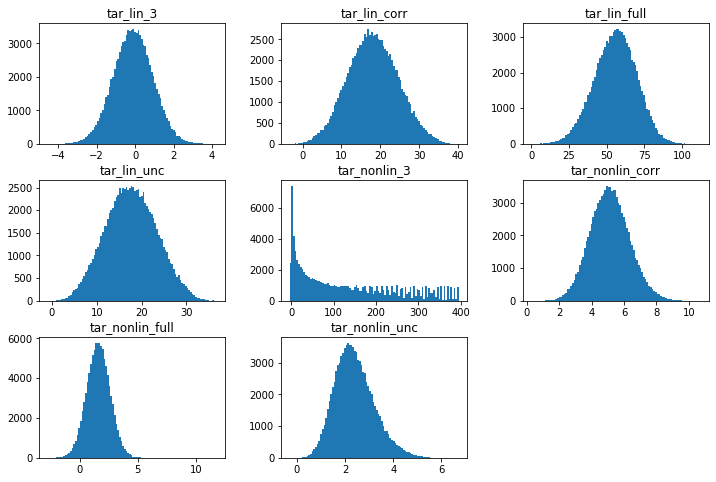

In [10]:
data[[col for col in data.columns if 'tar_' in col]].hist(bins=100, figsize=(12,8), grid=False)
plt.show()

In [11]:
data.to_csv('data/simulated/clean.csv', index=False)

# Making dirty data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
unc_normal_1               100000 non-null float64
unc_normal_2               100000 non-null float64
unc_skewed_pos             100000 non-null float64
unc_skewed_neg             100000 non-null float64
unc_binary                 100000 non-null int64
unc_categories_5           100000 non-null object
unc_categories_100         100000 non-null object
unc_ordinal                100000 non-null int64
corr_cat_1                 100000 non-null int64
corr_cat_2                 100000 non-null int64
corr_normal_by_cat         100000 non-null float64
corr_normal_by_2cats       100000 non-null float64
corr_multinormal_high_a    100000 non-null float64
corr_multinormal_high_b    100000 non-null float64
corr_multinormal_mid_a     100000 non-null float64
corr_multinormal_mid_b     100000 non-null float64
corr_multinormal_low_a     100000 non-null float64
corr_multinormal_low_b     100000

In [13]:
def dirtify(data):
    df = data.copy()
    n_entries = df.shape[0]
    np.random.seed(23)
    
    # adding random noise to some columns
    df['unc_normal_1'] += np.random.normal(loc=0, scale=0.5, size=n_entries) / 10
    df['corr_normal_by_cat'] += np.random.normal(loc=-0.5, scale=0.4, size=n_entries) / 10
    
    # make outliers
    random_entries = np.random.random(df.shape[0])<0.00001
    df['unc_normal_2'] = df['unc_normal_2'].mask(random_entries).fillna(df['unc_normal_2'] + 20)
    random_entries = np.random.random(df.shape[0])<0.00001
    df['corr_multinormal_mid_a'] = df['corr_multinormal_mid_a'].mask(random_entries).fillna(df['corr_multinormal_mid_a'] - 54)
    
    # adding 0.5% missing values
    missing = np.random.random(df.shape)<0.005
    df = df.mask(missing)
    
    return df

In [14]:
data_dirty = dirtify(data)

data_dirty.head()

,unc_normal_1,unc_normal_2,unc_skewed_pos,unc_skewed_neg,unc_binary,unc_categories_5,unc_categories_100,unc_ordinal,corr_cat_1,corr_cat_2,corr_normal_by_cat,corr_normal_by_2cats,corr_multinormal_high_a,corr_multinormal_high_b,corr_multinormal_mid_a,corr_multinormal_mid_b,corr_multinormal_low_a,corr_multinormal_low_b,tar_lin_full,tar_lin_unc,tar_lin_corr,tar_lin_3,tar_nonlin_full,tar_nonlin_unc,tar_nonlin_corr,tar_nonlin_3
0,0.366843,9.046767,2.098417,29.620455,0.0,b,ljr,7.0,1.0,0.0,0.453842,0.351782,8.430675,-3.355695,25.236371,11.646659,-5.525505,4.621740,79.339121,17.975525,9.018601,0.624460,2.251485,2.000470,3.968922,2.450614
1,0.014197,10.954762,2.895381,29.842289,1.0,a,vah,22.0,1.0,1.0,0.845540,-0.629935,3.334968,-0.792505,20.909618,11.555425,-5.988788,2.057060,49.482021,15.378844,18.116522,0.297647,1.535575,2.395349,5.133027,19.756608
2,-0.427691,9.986689,3.343133,29.393639,0.0,d,slv,81.0,1.0,0.0,1.193667,2.232988,3.895617,-1.586941,21.466997,11.038788,-5.470228,5.952688,64.436321,28.101300,31.443816,0.281222,0.731560,3.872721,7.215237,262.933200
3,0.521749,10.710674,3.307999,28.968660,1.0,d,exm,95.0,0.0,1.0,0.071048,3.870697,8.248896,-3.246644,21.905036,9.963264,-5.431880,3.758482,69.456178,24.317470,27.354147,0.771001,2.566616,3.447710,6.484387,361.716714
4,0.385919,9.140127,1.827119,28.887216,0.0,d,jgc,29.0,0.0,1.0,-0.315196,4.352840,4.496770,-1.173505,17.377266,6.832519,-8.288617,3.684319,19.475321,20.812954,23.635420,0.611498,2.750494,2.395742,5.218207,34.408310


In [15]:
data_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
unc_normal_1               99495 non-null float64
unc_normal_2               99516 non-null float64
unc_skewed_pos             99501 non-null float64
unc_skewed_neg             99506 non-null float64
unc_binary                 99542 non-null float64
unc_categories_5           99508 non-null object
unc_categories_100         99493 non-null object
unc_ordinal                99549 non-null float64
corr_cat_1                 99509 non-null float64
corr_cat_2                 99488 non-null float64
corr_normal_by_cat         99512 non-null float64
corr_normal_by_2cats       99519 non-null float64
corr_multinormal_high_a    99495 non-null float64
corr_multinormal_high_b    99497 non-null float64
corr_multinormal_mid_a     99507 non-null float64
corr_multinormal_mid_b     99492 non-null float64
corr_multinormal_low_a     99479 non-null float64
corr_multinormal_low_b     99486 non-null 

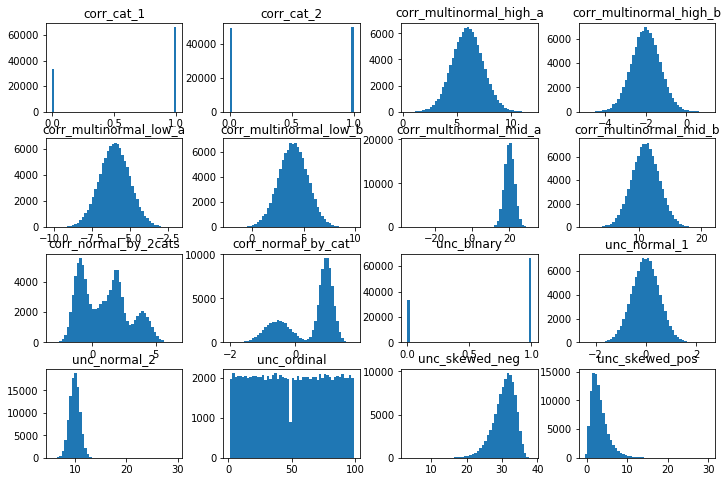

In [16]:
data_dirty[[col for col in data_dirty.columns if 'tar_' not in col]].hist(bins=50, figsize=(12,8), grid=False)
plt.show()

In [17]:
data_dirty.to_csv('data/simulated/dirty.csv', index=False)

# Exploration